# Chained Queueing Simulation  

### Starting from Previous Example

In [1]:
# Dependencies
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# R packages via python
# Documentation - https://rpy2.github.io/doc/latest/html/index.html
from rpy2.robjects import r, pandas2ri
from rpy2.robjects.packages import importr
from rpy2.robjects import FloatVector


In [3]:
# Documentation - https://github.com/AnthonyEbert/queuecomputer
pandas2ri.activate()
importr('queuecomputer')

rpy2.robjects.packages.Package as a <module 'queuecomputer'>

In [4]:
# Constants
lamdba = 1             # average number of arrivals per time period
walkin_mean = 2        # average time interval between walk-ins in minutes
walkin_sd = 0.5        # standard deviation of walk-ins in minutes
service_time_mean = 3  # time in minutes to complete service and allow next object in queue
service_time_sd = 0.5  # standard deviation of service time
number_of_people = 25  # simulation size

In [5]:
# calc arrival time and service time interval
cumulative_time = np.random.normal(loc=walkin_mean, scale=walkin_sd, size=number_of_people).cumsum()
cumulative_time = np.insert(cumulative_time, 0,0)
service_time = np.random.normal(loc=service_time_mean, scale=service_time_sd, size=number_of_people)
service_time = np.insert(service_time, 0,0)

In [6]:
arrival = FloatVector(cumulative_time)
service = FloatVector(service_time)

In [7]:
## Outputs of simulation (see below) 
##  $ departures     : num array of size n
##  $ server         : int array of size n
##  $ departures_df  : tibble [n x 6] (S3: tbl_df/tbl/data.frame)
##  $ queuelength_df :'data.frame': n obs. of  2 variables:
##  $ systemlength_df:'data.frame': n obs. of  2 variables:
##  $ servers_input  : num 1
##  $ state          : num 101
##  - attr(*, "class")= chr [1:2] "queue_list" "list"
simulation = r['queue_step'](arrivals=arrival, service=service,servers=1)

In [8]:
print('Departures: ', simulation[0])
print('Servers: ', simulation[1])
print('Summary Dataframe: ', simulation[2])
# print('Wait List: ', simulation[3])

Departures:  [ 0.          4.86805229  8.54982786 12.0809747  15.49128906 18.68872351
 22.32277124 25.42093965 28.74059938 31.66777774 34.22552847 37.24241063
 40.14230176 43.45960379 47.56789407 50.08581216 52.90230853 56.02568359
 58.39818978 61.8307628  64.67946699 66.62959531 69.12447187 72.89977812
 76.62181709 80.19582   ]
Servers:   [1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

Summary Dataframe:  # A tibble: 26 x 6
   arrivals service departures waiting system_time server
      <dbl>   <dbl>      <dbl>   <dbl>       <dbl>  <int>
 1     0       0          0     0             0         1
 2     1.98    2.89       4.87  0             2.89      1
 3     4.82    3.68       8.55  0.0530        3.73      1
 4     7.22    3.53      12.1   1.33          4.86      1
 5     9.05    3.41      15.5   3.03          6.44      1
 6    10.0     3.20      18.7   5.49          8.68      1
 7    12.4     3.63      22.3   6.33          9.96      1
 8    14.4     3.10      25.4   7.94    

Average Wait Time:  14.184441476571614  min
Maximum Queue Size:  10


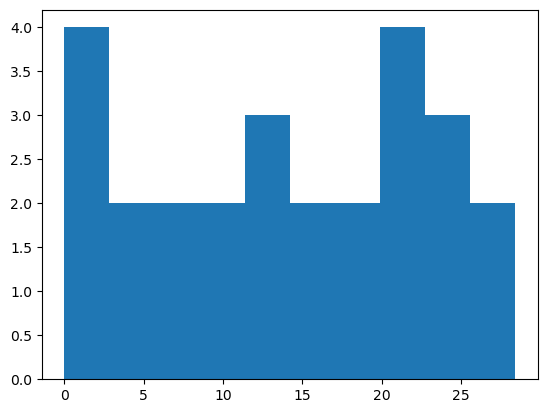

In [9]:
df_events = simulation[2]
print('Average Wait Time: ', df_events.rx2('waiting').mean(), ' min')

df_queue = simulation[3]
print('Maximum Queue Size: ', max(df_queue.rx2('queuelength')))

plt.hist(df_events.rx2('waiting'));

### Chaining

In [ ]:
# Instead of just one queue, this will show how to handle a sequence of queues
# The departure times from the first queue will be split into two additional queues (groups)
# The splitting is typically determined via experience (real data)
# The groups will represent the proportion of people going to that process.
# A common example is a registration occuring and then having people go to two separate lines like a DMV has registration updates and driving tests

In [17]:
# departures from one queque will fill the next queque
departures = df_events.rx2('departures')

# assign each record a random percent
random_assignment = np.random.random(len(departures))
# Split 40% to this queue
queue2 = FloatVector(departures[random_assignment > 0.6])  
# The remaining split (60%) is assigned to this queue
queue3 = FloatVector(departures[random_assignment <= 0.6])



Average Wait Time:  2.322917029380018  min
Maximum Queue Size:  2


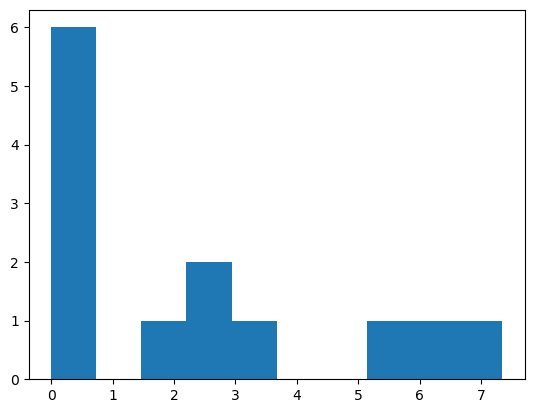

In [18]:
service_time_mean = 5
service_time_sd = 0.5
number_of_people = len(queue2)

service_time_q2 = FloatVector(np.random.normal(loc=service_time_mean, scale=service_time_sd, size=number_of_people))
simulation2 = r['queue_step'](arrivals=queue2, service=service_time_q2, servers=1)

df_events = simulation2[2]
print('Average Wait Time: ', df_events.rx2('waiting').mean(), ' min')

df_queue = simulation2[3]
print('Maximum Queue Size: ', max(df_queue.rx2('queuelength')))

plt.hist(df_events.rx2('waiting'));

Average Wait Time:  17.12711971396167  min
Maximum Queue Size:  5


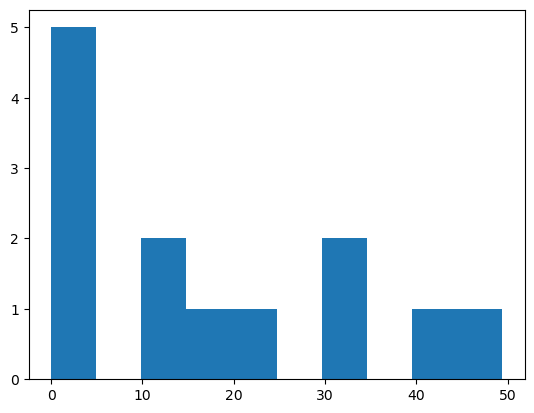

In [19]:
service_time_mean = 10
service_time_sd = 1
number_of_people = len(queue3)

service_time_q3 = FloatVector(np.random.normal(loc=service_time_mean, scale=service_time_sd, size=number_of_people))
simulation3 = r['queue_step'](arrivals=queue3, service=service_time_q3, servers=1)

df_events = simulation3[2]
print('Average Wait Time: ', df_events.rx2('waiting').mean(), ' min')

df_queue = simulation3[3]
print('Maximum Queue Size: ', max(df_queue.rx2('queuelength')))

plt.hist(df_events.rx2('waiting'));

### Improvements
* future example should include how to optimize for the number of servers
* an object oriented method would allow to track individuals through the entire process easily but it could be done by tracking with arrays.  
* need to develop a good visualization